# 聚类分析


将认识对象进行分类是人类认识世界的一种重要方法，比如有关世界的时间进程的研究，就形成了历史学，也有关世界空间地域的研究，则形成了地理学。又如在生物学中，为了研究生物的演变，需要对生物进行分类，生物学家根据各种生物的特征，将它们归属于不同的界、门、纲、目、科、属、种之中。

通常，人们可以凭经验和专业知识来实现分类。而聚类分析（Cluster Analyses）作为一种定量方法，将从数据分析的角度，给出一个更准确、细致的分类工具。




## KNN 算法

最近邻 (k-Nearest Neighbors， KNN) 算法是一种分类算法， 1968年由 Cover和 Hart 提出， 应用场景有字符识别、 文本分类、 图像识别等领域。

```{tip}
KNN算法的思想是： 一个样本与数据集中的个样本最相似， 如果这个样本中的大多数属于某一个类别， 则该样本也属于这个类别。

 ```{figure} ../_static/lecture_specific/clustering/knn.jpg
---
height: 350px
name: knn
---
```


那么样本之间的相似度如何度量呢？我们接下来展开讨论。


要用数量化的方法对事物进行分类，就必须用数量化的方法描述事物之间的相似程度。一个事物常常需要用多个变量来刻画。如果对于一群有待分类的样本点需用$p$个变量描述，则每个样本点可以看成是 $R^{p}$ 空间中的一个点。因此，很自然地想到可以用距离来度量样本点间的相似程度。在聚类分析中，最一般的相似度度量方法是 Minkowski 距离

$$
d_{q}(x, y)=\left[\sum_{k=1}^{p}\left|x_{k}-y_{k}\right|^{q}\right]^{\frac{1}{q}}, \quad q>0
$$




```{admonition} 相似度度量常用的距离

当 $q=1,2$时， 分别得到
- 绝对值距离(曼哈顿距离)

$$
d_{1}(x, y)=\sum_{k=1}^{q}\left|x_{k}-y_{k}\right|
$$

- 欧式距离

$$
d_{2}(x, y)=\left[\sum_{k=1}^{p}\left|x_{k}-y_{k}\right|^{2}\right]^{\frac{1}{2}}
$$
```

最常用的是欧氏距离，它的主要优点是当坐标轴进行正交旋转时，欧氏距离是保持不变的。例如我们可以通过搞笑镜头、拥抱镜头、打斗镜头三个维度来衡量电影之间的相似性。《唐人街探案》和《伦敦陷落》之间的相似性可以用三个镜头组成的向量之间的欧式距离来衡量

```{figure} ../_static/lecture_specific/clustering/dis-demo.png
---
height: 350px
name: dis-demo
---

```




```{warning}
值得注意的是在采用 Minkowski 距离时，一定要采用相同量纲的变量。如果变量的量纲不同，测量值变异范围相差悬殊时，建议首先进行数据的标准化处理，然后再计算距离。
```




有了距离和定义后，我们来看KNN算法的基本流程（在以下的讨论中，我们用欧氏距离衡量样本之间的相似度）

1. 计算已知类别数据集中的点与当前点之间的距离
2. 按距离递增次序排序
3. 选取与当前点距离最小的$k$个点
4. 统计前$k$个点所在的类别出现的频率
5. 返回前$k$个点出现频率最高的类别作为当前点的预测分类



比如我们想用数据的方法对《唐人街探案》进行分类，我们可以求解与其最相似的$k$个电影，然后投票选出其类型，这里我们以$k=5$的情况举例。

```{figure} ../_static/lecture_specific/clustering/trj.png
---
height: 350px
name: trj
---
```

这里是程序实现

In [1]:
import math
movie_data = {"宝贝当家": [45, 2, 9, "喜剧片"],
              "美人鱼": [21, 17, 5, "喜剧片"],
              "澳门风云3": [54, 9, 11, "喜剧片"],
              "功夫熊猫3": [39, 0, 31, "喜剧片"],
              "谍影重重": [5, 2, 57, "动作片"],
              "叶问3": [3, 2, 65, "动作片"],
              "伦敦陷落": [2, 3, 55, "动作片"],
              "我的特工爷爷": [6, 4, 21, "动作片"],
              "奔爱": [7, 46, 4, "爱情片"],
              "夜孔雀": [9, 39, 8, "爱情片"],
              "代理情人": [9, 38, 2, "爱情片"],
              "新步步惊心": [8, 34, 17, "爱情片"]}

# 测试样本  唐人街探案": [23, 3, 17, "？片"]
#下面为求与数据集中所有数据的距离代码：
x = [23, 3, 17]
KNN = []
for key, v in movie_data.items():
    d = math.sqrt((x[0] - v[0]) ** 2 + (x[1] - v[1]) ** 2 + (x[2] - v[2]) ** 2)
    KNN.append([key, round(d, 2)])

# 输出所用电影到 唐人街探案的距离
print(KNN)

#按照距离大小进行递增排序
KNN.sort(key=lambda dis: dis[1])

#选取距离最小的k个样本，这里取k=5；
KNN=KNN[:5]
print(KNN)

#确定前k个样本所在类别出现的频率，并输出出现频率最高的类别
labels = {"喜剧片":0,"动作片":0,"爱情片":0}
for s in KNN:
    label = movie_data[s[0]]
    labels[label[3]] += 1
labels =sorted(labels.items(),key=lambda l: l[1],reverse=True)
print(labels,labels[0][0],sep='\n')

[['宝贝当家', 23.43], ['美人鱼', 18.55], ['澳门风云3', 32.14], ['功夫熊猫3', 21.47], ['谍影重重', 43.87], ['叶问3', 52.01], ['伦敦陷落', 43.42], ['我的特工爷爷', 17.49], ['奔爱', 47.69], ['夜孔雀', 39.66], ['代理情人', 40.57], ['新步步惊心', 34.44]]
[['我的特工爷爷', 17.49], ['美人鱼', 18.55], ['功夫熊猫3', 21.47], ['宝贝当家', 23.43], ['澳门风云3', 32.14]]
[('喜剧片', 4), ('动作片', 1), ('爱情片', 0)]
喜剧片


## k-means聚类


k-means算法是集简单和经典于一身的基于距离的聚类算法,采用距离作为相似性的评价指标，即认为两个对象的距离越近，其相似度就越大。该算法认为类簇是由距离靠近的对象组成的，因此把得到紧凑且独立的簇作为最终目标。


k-means通过迭代寻找$k$个类簇的一种划分方案，使得用这$k$个类簇的均值来代表相应各类样本时所得的总体误差最小。

$k$个聚类具有以下特点：各聚类本身尽可能的紧凑，而各聚类之间尽可能的分开。k-means算法的基础是最小误差平方和准则,如果用数据表达式表示，假设簇划分为$\left(C_{1}, C_{2}, \ldots C_{k}\right)$，则我们的目标是最小化平方误差$E$:

$$
E=\sum_{i=1}^{k} \sum_{x \in C_{i}}\left\|x-\mu_{i}\right\|_{2}^{2}
$$

其中$\mu_{i}$是簇$C_i$的均值向量，有时也称质心，表达式为

$$
\mu_{i}=\frac{1}{\left|C_{i}\right|} \sum_{x \in C_{i}} x
$$

如果我们想直接寻求上式的最小值并不容易，这是一个NP难问题，只能采用启发式的迭代方法


```{admonition} k-means聚类算法步骤
- 随机选取$k$个聚类质心点（cluster centroids）为$\mu_{1}, \mu_{2}, \ldots, \mu_{k} \in \mathbb{R}^{n}$。
- 重复下面过程直到收敛
  
  - 对于每一个样例$i$，计算其应该属于的类

    $$
    c^{(i)}:=\arg \min _{j}\left\|x^{(i)}-\mu_{j}\right\|^{2}
    $$

  - 对于每一个类$j$，重新计算该类的质心

  $$
  \mu_{i}=\frac{1}{\left|C_{j}\right|} \sum_{x \in C_{j}} x
  $$

- 收敛指如果新计算出来的质心和原来的质心之间的距离小于某一个设置的阈值，表示重新计算的质心的位置变化不大，趋于稳定
```


我们通过一个示意图来解释k-means的计算过程


```{figure} ../_static/lecture_specific/clustering/k-means.jpg
---
height: 350px
name: k-means
---

```




- 图$a$表达了初始的数据集，假设$k=2$。
- 图$b$中，我们随机选择了两个类别所对应的类别质心，即图中的红色质心和蓝色质心。
- 图$c$表示通过求样本中所有点到这两个质心的距离，并标记每个样本的类别为和该样本距离最小的质心的类别，得到了所有样本点的第一轮迭代后所属的类别。
- 图$d$中，我们对我们当前标记为红色和蓝色的点分别求其新的质心新的红色质心和蓝色质心的位置已经发生了变动。
- 图$e$和图$f$重复了我们在图$c$和图$d$的过程，即将所有点的类别标记为距离最近的质心的类别并求新的质心。最终我们得到的两个类别如图$f$所示。



下面我们通过一个案例，来看python中k-means聚类的实现方法。本案例采用二维数据集，共80个样本，有4个类。数据存在testSet.txt中

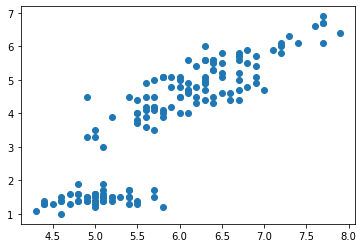

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
 
#加载数据集，是一个字典类似Java中的map
lris_df = datasets.load_iris()
 

#挑选出前两个维度作为x轴和y轴，你也可以选择其他维度
x_axis = lris_df.data[:,0]
y_axis = lris_df.data[:,2]
 
#绘制散点图
plt.scatter(x_axis, y_axis)

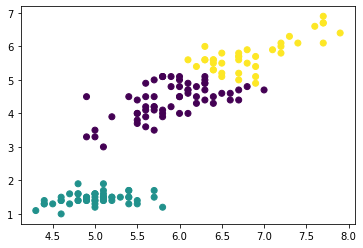

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
 
#加载数据集，是一个字典类似Java中的map
lris_df = datasets.load_iris()
 
#挑选出前两个维度作为x轴和y轴，你也可以选择其他维度
x_axis = lris_df.data[:,0]
y_axis = lris_df.data[:,2]
 
 
#这里已经知道了分3类，其他分类这里的参数需要调试
model = KMeans(n_clusters=3)
 
#训练模型
model.fit(lris_df.data)

#预测全部150条数据
all_predictions = model.predict(lris_df.data)
 
#打印出来对150条数据的聚类散点图
plt.scatter(x_axis, y_axis, c=all_predictions)
plt.show()

```{tip} 
请你自行尝试分两类或者分四类的情况，你有什么发现？
```




## 系统聚类法


系统聚类法是聚类分析方法中最常用的一种方法。它的优点在于可以指出由粗到细的多种分类情况，典型的系统聚类结果可由一个聚类图展示出来。

例如，在平面上有 7 个点 $w_1,w_2,w_3,w_4,w_5,w_6,w_7$（如图（a）），可以用聚类图（如图 （b））来表示聚类结果。

 ```{figure} ../_static/lecture_specific/clustering/h-c.png
---
height: 350px
name: h-c
---
```

记 $\Omega=\left\{w_{1}, w_{2}, \cdots, w_{7}\right\}$，


聚类结果如下：当距离为 $f_5$时，分为一类

$$
G_{1}=\left\{w_{1}, w_{2}, w_{3}, w_{4}, w_{5}, w_{6}, w_{7}\right\}
$$


距离值为 $f_4$分为两类：

$$
G_{1}=\left\{w_{1}, w_{2}, w_{3}\right\}, \quad G_{2}=\left\{w_{4}, w_{5}, w_{6}, w_{7}\right\}
$$


距离值为$f_3$分为三类：

$$
G_{1}=\left\{w_{1}, w_{2}, w_{3}\right\}, \quad G_{2}=\left\{w_{4}, w_{5}, w_{6}\right\}, \quad G_{3}=\left\{w_{7}\right\}
$$


距离值为 $f_2$分为四类：

$$
G_{1}=\left\{w_{1}, w_{2}, w_{3}\right\}, \quad G_{2}=\left\{w_{4}, w_{5}\right\}, \quad G_{3}=\left\{w_{6}\right\}, \quad G_{4}=\left\{w_{7}\right\}
$$


距离值为 $f_1$分为六类：

$$
G_{1}=\left\{w_{4}, w_{5}\right\}, G_{2}=\left\{w_{1}\right\}, G_{3}=\left\{w_{2}\right\}, G_{4}=\left\{w_{3}\right\}, G_{5}=\left\{w_{6}\right\}, G_{6}=\left\{w_{7}\right\}
$$


距离小于 $f_1$分为七类，每一个点自成一类.


怎样才能生成这样的聚类图呢？步骤如下：

```{admonition} 系统聚类计算流程

设$\Omega=\left\{w_{1}, w_{2}, \cdots, w_{7}\right\}$
1. 计算$n$ 个样本点两两之间的距离$\left\{d_{i j}\right\}$ ，记为矩阵$D=\left(d_{i j}\right)_{n \times n}$ ；
2. 首先构造$n$ 个类，每一个类中只包含一个样本点，每一类的平台高度均为零；
3. 合并距离最近的两类为新类，并且以这两**类间的距离值**作为聚类图中的平台高
度；
4. 计算新类与当前各类的距离，若类的个数已经等于 1，转入步骤 (5），否则，回到步骤 (3）；
5. 画聚类图；
6. 决定类的个数和类
```





下面我们通过一个案例来看系统聚类的实际应用。在服装标准制定中，对某地成年女子的各部位尺寸进行了统计，通过14个部位的测量资料，获得各因素之间的相关系数表

![Image Name](https://cdn.kesci.com/upload/image/qfq81boanz.png?imageView2/0/w/960/h/960)


其中 $x_1$ − 上体长，$x_2$ − 手臂长，$x_3$ − 胸围，$x_4$ − 颈围，$x_5$ − 总肩围，$x_6$ − 总胸宽，$x_7$ − 后背宽，$x_8$ − 前腰节高，$x_9$ −后腰节高，$x_{10}$ −总体长，$x_{11}$ − 身高，$x_{12}$ −下体长，$x_{13}$ −腰围， $x_{14}$ −臀围。



在系统分析或评估过程中，为避免遗漏某些重要因素，往往在一开始选取指标时，尽可能多地考虑所有的相关因素。而这样做的结果，则是变量过多，变量间的相关度高，给系统分析与建模带来很大的不便。因此，人们常常希望能研究变量间的相似关系，按照变量的相似关系把它们聚合成若干类，进而找出影响系统的主要因素。


在聚类分析之前，首先要确定变量的相似性度量，常用的变量相似性度量是相关系数。记变量$x_{j}$ 的取值 

$$
\left(x_{1 j}, x_{2 j}, \cdots, x_{n j}\right)^{T} \in R^{n}(j=1,2, \cdots, m)
$$

则可以用两变量$x_j$与$x_k$的样本**相关系数**作为它们的相似性度量

$$
r_{j k}=\frac{\sum_{i=1}^{n}\left(x_{i j}-\bar{x}_{j}\right)\left(x_{i k}-\bar{x}_{k}\right)}{\left[\sum_{i=1}^{n}\left(x_{i j}-\bar{x}_{j}\right)^{2} \sum_{i=1}^{n}\left(x_{i k}-\bar{x}_{k}\right)^{2}\right]^{\frac{1}{2}}}
$$


用最大系数法对这14个变量进行系统聚类，其中类别与类别之间的距离定义为：

$$
R\left(G_{1}, G_{2}\right)=\max _{x_{j} \in G_{1} \atop x_{k} \in G_{2}}\left\{r_{j k}\right\}
$$


分类结果如图下（为了方便观察，平台高度定义为“1-相似系数”）。

![Image Name](https://cdn.kesci.com/upload/image/qfq81mbtb8.png?imageView2/0/w/960/h/960)



这时，$R\left(G_{1}, G_{2}\right)$等于两类中最相似的两变量间的相似性度量值。


可以看出，人体的变量大体可以分为两类：
  - 一类反映人高、矮的变量，如上体长，手臂长，前腰节高，后腰节高，总体长，身高，下体长；
  - 另一类是反映人体胖瘦的变量，如胸围，颈围，总肩围，总胸宽，后背宽，腰围，臀围。


### 系统聚类法python实例

首先还是导入各种库

In [4]:
import numpy as np  
from matplotlib import pyplot as plt  
from scipy.cluster.hierarchy import dendrogram, linkage 

接下来是生成数据集。我们这次用的数据集是随机生成的，数量也不多，一共15个数据点，分为两个数据簇，一个有7个数据点，另一个有8个。

之所以把数据点数量设置这么少，是因为便于看清数据分布，以及后面画图时容易看清图片的分类。代码如下。

In [5]:
state = np.random.RandomState(99) #设置随机状态  
a = state.multivariate_normal([10, 10], [[1, 3], [3, 11]], size=7)  #生成多元正态变量  
b = state.multivariate_normal([-10, -10], [[1, 3], [3, 11]], size=8)  
data = np.concatenate((a, b)) #把数据进行拼接 

这里我们设置一个随机状态，便于重复试验。然后利用这个随机状态生成两个变量$a$和$b$，这两个变量就是前面说过的数据簇，$a$有7个数据点，$b$有8个，$a$和$b$都是多元正态变量，其中a的均值向量是[10, 10]，b的均值向量是[-10, -10]，两者协方差矩阵是[[1, 3], [3, 11]]。然后对$a$与$b$进行拼接，得到变量data。


接下来要绘制数据点的分布。代码如下。

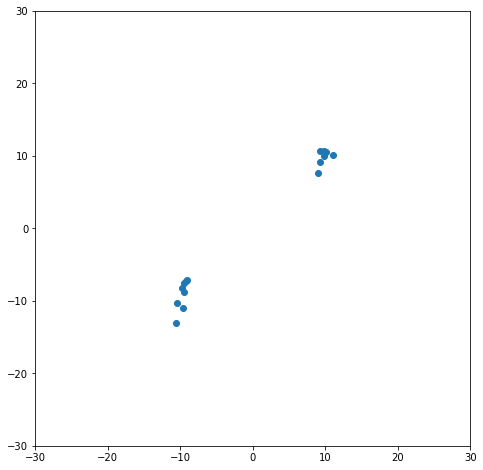

In [6]:
import numpy as np  
from matplotlib import pyplot as plt  
from scipy.cluster.hierarchy import dendrogram, linkage

state = np.random.RandomState(99) #设置随机状态  
a = state.multivariate_normal([10, 10], [[1, 3], [3, 11]], size=7)  #生成多元正态变量  
b = state.multivariate_normal([-10, -10], [[1, 3], [3, 11]], size=8)  
data = np.concatenate((a, b)) #把数据进行拼接 
#此处以下为绘制数据点分布代码
ig, ax = plt.subplots(figsize=(8,8)) #设置图片大小  
ax.set_aspect('equal') #把两坐标轴的比例设为相等  
plt.scatter(data[:,0], data[:,1])  
plt.ylim([-30,30]) #设置Y轴数值范围  
plt.xlim([-30,30])  
plt.show() 

这里代码比较简单，不再赘述，主要说一下ax.set_aspect('equal')这行代码，因为matplotlib默认情况下$x$轴和$y$轴的比例是不同的，也就是相同单位长度的线段，在显示时长度是不一样的，所以要把二者的比例设为一样，这样图片看起来更协调更准确。

所绘制图片如上所示，从图中可以明显看到两个数据簇，上面那个数据簇大概集中在坐标点[10, 10]附近，而下面那个大概集中在[-10, -10]附近，这和我们设置的是一样的。从图中可以很明显看出，这个数据集大概可以分为两类，即上面的数据簇分为一类，下面的数据簇分为另一类。

然后是数据处理，代码如下。

In [7]:
z = linkage(data, "average") #用average算法，即类平均法 

数据处理只有这一行代码，非常简单，但难点也就在这。首先我们来看一下z的结果，如图下所示。


![Image Name](https://cdn.kesci.com/upload/image/qfq84kinki.png?imageView2/0/w/960/h/960)

这个结果不是很好理解。scipy官方对此有一些设定，比如该结果中第一行有4个数字，即11、13、0.14740505、2，前两个数字就是指“类”，刚开始每个点就是一个类，所以11和13这两个点就是两个类，第三个数字0.14740505就是这两个点的距离，这两个点被合并成一个类，所以这个新的类包含两个点（11和13），这也就是第四个点的数值2。

而这个新的类就被算为类15。注意这里是类15，不是第15个类，因为我们原来的数据集中有15个点，按照顺序就是类0、类1、类2...类14，因为python是从0开始，所以这里类15就是指第16个类。

z的第二行数据里，前两个数字是2和5，就是原来类2和类5，距离是0.3131184，包含2个点，这行数据和第一行类似。

然后再看第三行数据，前两个数字是10和15，就是类10与类15，类15就是前面第一行合并成的新类，其包含11和13这两个点，类15与类10的距离是0.39165998，这个数字是类11和13与类10的平均距离，因为我们这里用的算法是average，类10、11和13合并为了一个新类，其包含3个点，所以第四个数字就是3。

z中其他行的数据按照此规律以此类推。最后一行数据中，类26和27合并成一个新类，这个类包含了全部15个点，也就是这15个点最终划为了一个类，算法终止。


接下来就是画图，代码如下

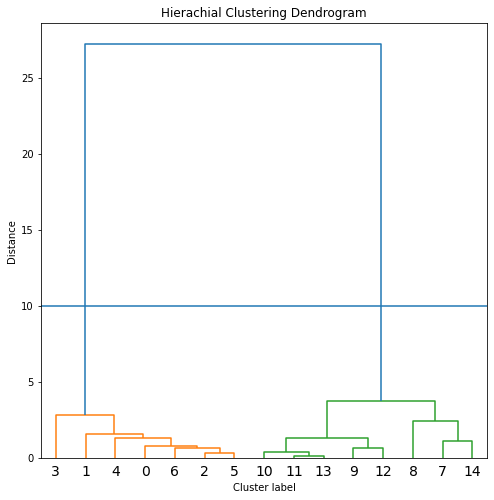

In [8]:
fig, ax = plt.subplots(figsize=(8,8))  
dendrogram(z, leaf_font_size=14) #画图 
plt.title("Hierachial Clustering Dendrogram")  
plt.xlabel("Cluster label")  
plt.ylabel("Distance")  
plt.axhline(y=10) #画一条分类线  
plt.show()

完整代码如下

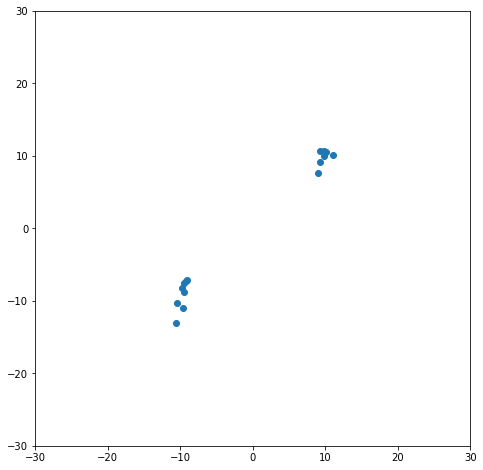

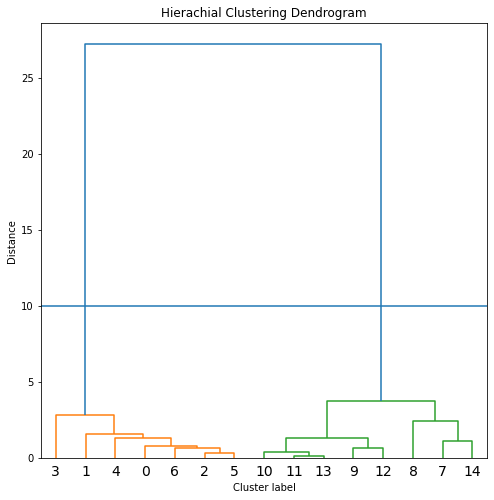

In [9]:
import numpy as np  
from matplotlib import pyplot as plt  
from scipy.cluster.hierarchy import dendrogram, linkage
state = np.random.RandomState(99) #设置随机状态 
a = state.multivariate_normal([10, 10], [[1, 3], [3, 11]], size=7)  #生成多元正态变量  
b = state.multivariate_normal([-10, -10], [[1, 3], [3, 11]], size=8)  
data = np.concatenate((a, b)) #把数据进行拼接 

fig, ax = plt.subplots(figsize=(8,8)) #设置图片大小  
ax.set_aspect('equal') #把两坐标轴的比例设为相等  
plt.scatter(data[:,0], data[:,1])  
plt.ylim([-30,30]) #设置Y轴数值范围  
plt.xlim([-30,30])  
plt.show()

z = linkage(data, "average") #用average算法，即类平均法

fig, ax = plt.subplots(figsize=(8,8))  
dendrogram(z, leaf_font_size=14) #画图 
plt.title("Hierachial Clustering Dendrogram")  
plt.xlabel("Cluster label")  
plt.ylabel("Distance")  
plt.axhline(y=10) #画一条分类线  
plt.show() 

##  课后习题

课后作业
1.数据集如下，使用K-means算法进行聚类（聚成三类）

(150, 2)


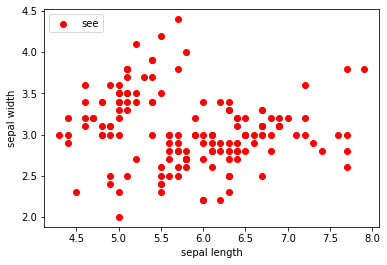

In [10]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn import datasets 
iris = datasets.load_iris() 
X = iris.data[:, :2] # #表示我们取特征空间中的2个维度
print(X.shape)
# 绘制数据分布图
plt.scatter(X[:, 0], X[:, 1], c="red", marker='o', label='see') 
plt.xlabel('sepal length') 
plt.ylabel('sepal width') 
plt.legend(loc=2) 
plt.show() 

2.数据如下，使用系统聚类法进行聚类

In [11]:
import numpy as np 
data=np.array([[  9.31556164 , 10.69767437],
 [  9.21300425 ,  9.20698909],
 [ 10.16931836 , 10.50496561],
 [  8.97948118 ,  7.58733691],
 [ 11.04203644 , 10.11493029],
 [  9.881797   , 10.62895995],
 [  9.79766011 ,  9.97217018],
 [ -9.67975098 ,-11.05412528],
 [-10.58070834 ,-12.99003422],
 [ -9.7736453  , -8.27254942],
 [ -9.43198433 , -7.54610439],
 [ -9.13994785 , -7.18378278],
 [ -9.47403457 , -8.81266627],
 [ -9.23248318 , -7.29852363],
 [-10.47829261 ,-10.30055412],
 [ 10.50596899 , -8.09211343],
 [  7.81810663 ,-17.27380884],
 [  9.38509479 ,-11.5525437 ],
 [ 11.66143844 , -4.37736872],
 [ 11.62327952 , -2.8127609 ],
 [  8.64840945 ,-15.69415165],
 [  8.82528612 ,-15.96868896],
 [ 10.87536071 , -5.98830375],
 [ 10.94598118 , -7.34968697]])